In [9]:
#Import necessary libraries
import pandas as pd

# Load dataset from a designated path and MS Excel file into a dataframe called "data"
file_path = '/Users/airturtle/Desktop/UW/Teaching/NLP_Course/Python/PCA_SampleData.xlsx'
data = pd.read_excel(file_path)
print (data)

   word1  word2  word3  word4  word5
0      1      1      1      0      0
1      1      0      0      1      0
2      0      0      1      1      0
3      0      0      1      1      0
4      0      1      2      0      0
5      1      0      1      0      1
6      1      2      2      1      1


In [13]:
#Normalize the data to prepare it for PCA

#pip install -U scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_scaled, columns=data.columns)

print (data_normalized)

      word1     word2     word3     word4     word5
0  0.866025  0.588348 -0.223607 -1.154701 -0.632456
1  0.866025 -0.784465 -1.788854  0.866025 -0.632456
2 -1.154701 -0.784465 -0.223607  0.866025 -0.632456
3 -1.154701 -0.784465 -0.223607  0.866025 -0.632456
4 -1.154701  0.588348  1.341641 -1.154701 -0.632456
5  0.866025 -0.784465 -0.223607 -1.154701  1.581139
6  0.866025  1.961161  1.341641  0.866025  1.581139


In [21]:
# Create a PCA object where we will only keep the 2 first principal components
pca = PCA()

# Use the `fit_transform` method from this object to our dataframe
pca_results = pca.fit_transform(data_normalized)

print (pca_results)

[[ 4.59295646e-01 -3.96825983e-01 -1.14016671e+00 -1.10049248e+00
   3.30069789e-18]
 [-1.64635820e+00 -1.55721167e+00  4.16547579e-01 -6.37549400e-01
   1.05034325e-16]
 [-1.44660406e+00  7.82160076e-01  5.59251518e-01  3.62654100e-01
  -8.81509409e-17]
 [-1.44660406e+00  7.82160076e-01  5.59251518e-01  3.62654100e-01
   1.45619150e-16]
 [ 6.59049781e-01  1.94254576e+00 -9.97462771e-01 -1.00288981e-01
   1.05034325e-16]
 [ 7.65318132e-01 -1.44157030e+00 -9.96769935e-01  1.26147964e+00
   5.41675114e-17]
 [ 2.65590276e+00 -1.11257966e-01  1.59934880e+00 -1.48456979e-01
   5.41675114e-17]]


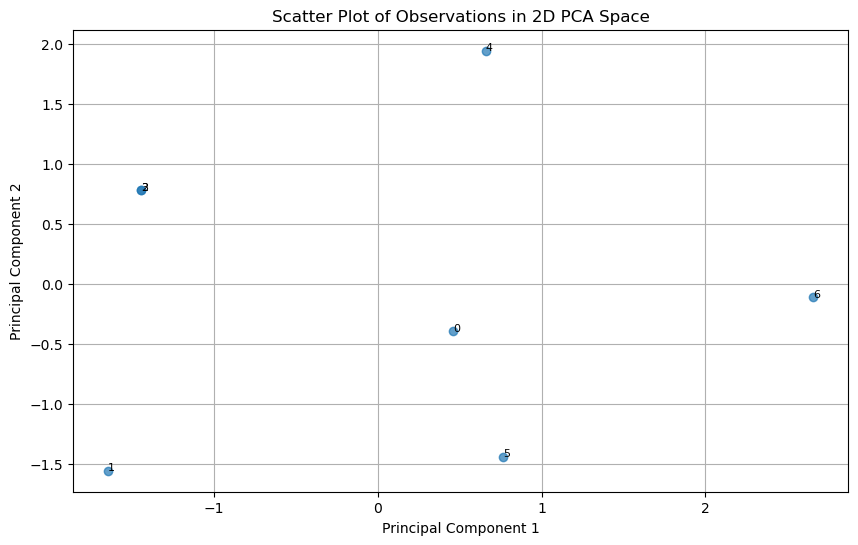

In [25]:
# Create a scatter plot to visualize the observations in the 2D PCA space
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], # position on the first principal component of the observations
            pca_results[:, 1], alpha=0.7) # position on the second principal component of the observations

# Add title and axis label
plt.title('Scatter Plot of Observations in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# (optionally) Add labels to each point based on their index in the original dataframe
for i, txt in enumerate(data_normalized.index):
    plt.annotate(txt, (pca_results[i, 0], pca_results[i, 1]), fontsize=8)
    # This might be useful when doing outlier detection

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()